# Capstone project - HealthCare Fraud Detection : LightGBM Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,\
StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve,roc_auc_score,f1_score
from sklearn.feature_selection import RFE
from yellowbrick.classifier import confusion_matrix, classification_report, ROCAUC
from yellowbrick.model_selection import CVScores
from cp_clean_helper import show_values
from LGR_helper import std_num_cols, rb_scale_cols, model_results, get_confusion_matrix
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### # Loading datasets, and looking at shapes:-

In [2]:
# Loading train-test 70:30 split (SMOTE and BorderlineSMOTE) datasets
# For these same columns have been drooped as done for the LGR model

trainX_SM = pd.read_csv("trainX_SM.csv",index_col=0)
trainY_SM = pd.read_csv("trainY_SM.csv",index_col=0)
testX_SM = pd.read_csv("testX_SM.csv",index_col=0)
testY_SM = pd.read_csv("testY_SM.csv",index_col=0)

trainX_BSM = pd.read_csv("trainX_BSM.csv",index_col=0)
trainY_BSM = pd.read_csv("trainY_BSM.csv",index_col=0)
testX_BSM = pd.read_csv("testX_BSM.csv",index_col=0)
testY_BSM = pd.read_csv("testY_BSM.csv",index_col=0)

# Looking at dataset shapes

print('\n')
print('Shape of SMOTE balanced trainX data :',trainX_SM.shape)
print('Shape of SMOTE balanced trainY data :',trainY_SM.shape)
print('Shape of SMOTE balanced testX data :',testX_SM.shape)
print('Shape of SMOTE balanced testY data :',testY_SM.shape)
print('Shape of Borderline SMOTE balanced trainX data :',trainX_BSM.shape)
print('Shape of Borderline SMOTE balanced trainY data :',trainY_BSM.shape)
print('Shape of Borderline SMOTE balanced testX data :',testX_BSM.shape)
print('Shape of Borderline SMOTE balanced testY data :',testY_BSM.shape, end='\n')
print('\n')
print("*"*60)

# Looking at class ratios

print('\n')
print('Class ratio - Fraud/Non-Fraud (trainY_SM) :',trainY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_SM) :',testY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (trainY_BSM) :',trainY_BSM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_BSM) :',testY_BSM.value_counts(normalize=True)*100, end='\n')
print('\n')
print("*"*60)



Shape of SMOTE balanced trainX data : (483580, 44)
Shape of SMOTE balanced trainY data : (483580, 1)
Shape of SMOTE balanced testX data : (207250, 44)
Shape of SMOTE balanced testY data : (207250, 1)
Shape of Borderline SMOTE balanced trainX data : (483580, 44)
Shape of Borderline SMOTE balanced trainY data : (483580, 1)
Shape of Borderline SMOTE balanced testX data : (207250, 44)
Shape of Borderline SMOTE balanced testY data : (207250, 1)


************************************************************


Class ratio - Fraud/Non-Fraud (trainY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (trainY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64


*******

### # Standardizing the train/test features for balanced datasets:

In [3]:
# SMOTE balanced dataset

# std_num_cols(trainX_SM)
# std_num_cols(testX_SM)

# BorderlineSMOTE balanced dataset

# std_num_cols(trainX_BSM)
# std_num_cols(testX_BSM)

### Baseline LightGBM Classifier Model - Standardized:

In [4]:
# SMOTE Balanced

# lgbm_std_sm = lgb.LGBMClassifier()
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, lgbm_std_sm, show = True)

In [5]:
# BorderlineSMOTE Balanced

# lgbm_std_bsm = lgb.LGBMClassifier()
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, lgbm_std_bsm, show = True)

### # Robust Scaling the train/test features for  balanced datasets:

In [6]:
# SMOTE balanced dataset

rb_scale_cols(trainX_SM)
rb_scale_cols(testX_SM)

# BorderlineSMOTE balanced dataset

rb_scale_cols(trainX_BSM)
rb_scale_cols(testX_BSM)

### Baseline LightGBM Classifier Model - Robust Scaled:

In [7]:
# SMOTE Balanced

lgbm_sm = lgb.LGBMClassifier()
model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, lgbm_sm, show = True)

The Model Results for  LGBMClassifier()
************************************************************
Train Accuracy is equal to 0.792
Test Accuracy is equal to 0.792
The Precision score is 0.843
The Average Precision score is 0.746
The Recall score is 0.717
The F1 score is 0.775
The AUC/ROC score is 0.792
True-Positive: 74318.000
True-Negative: 89771.000
False-Positive: 13854.000
False-Negative: 29307.000
Correctly Classified: 164089.000
Incorrectly Classified: 43161.000


[0.7917697175234708,
 0.7917442702050663,
 0.8428752892074581,
 0.7171821471652593]

In [8]:
# BorderlineSMOTE Balanced

lgbm_bsm = lgb.LGBMClassifier()
model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, lgbm_bsm, show = True)

The Model Results for  LGBMClassifier()
************************************************************
Train Accuracy is equal to 0.792
Test Accuracy is equal to 0.791
The Precision score is 0.846
The Average Precision score is 0.746
The Recall score is 0.713
The F1 score is 0.774
The AUC/ROC score is 0.791
True-Positive: 73883.000
True-Negative: 90126.000
False-Positive: 13499.000
False-Negative: 29742.000
Correctly Classified: 164009.000
Incorrectly Classified: 43241.000


[0.7919620331692792,
 0.7913582629674306,
 0.8455173834428144,
 0.7129843184559711]

### # Plotting scores for different depth of trees in the random forest (SM):

In [9]:
# depth_range = range(9, 16)
# train_error = []
# test_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for max_depth in depth_range:
#     lg = lgb.LGBMClassifier()
#     lg.set_params(max_depth=max_depth)
#     lg.fit(trainX_SM, trainY_SM)
#     train_error.append(1 - lg.score(trainX_SM, trainY_SM))
#     test_error.append(1 - lg.score(testX_SM, testY_SM))
#     train_AUC.append(roc_auc_score(trainY_SM, lg.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, lg.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, lg.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, lg.predict(testX_SM)))

In [10]:
# plt.plot(depth_range, train_error, c='red', label='Training Error')
# plt.plot(depth_range, test_error, c='blue', label='Test Error')
# plt.ylabel('Errors')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [11]:
# plt.plot(depth_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(depth_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [12]:
# plt.plot(depth_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(depth_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

### # Plotting scores for different number of trees in the random forest (SM):

In [13]:
# tree_range = [100,200,300,400,500]
# train_error = []
# test_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for n_estimators in tree_range:
#     lg = lgb.LGBMClassifier()
#     lg.set_params(n_estimators=n_estimators)
#     lg.fit(trainX_SM, trainY_SM)
#     train_error.append(1 - lg.score(trainX_SM, trainY_SM))
#     test_error.append(1 - lg.score(testX_SM, testY_SM))
#     train_AUC.append(roc_auc_score(trainY_SM, lg.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, lg.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, lg.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, lg.predict(testX_SM)))

In [14]:
# plt.plot(tree_range, train_error, c='red', label='Training Error')
# plt.plot(tree_range, test_error, c='blue', label='Test Error')
# plt.ylabel('Errors')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [15]:
# plt.plot(tree_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(tree_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [16]:
# plt.plot(tree_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(tree_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

### # Plotting scores for different number of leaves in the random forest (SM):

In [17]:
# leaves_range = [30,70,100,150,200]
# train_error = []
# test_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for num_leaves in leaves_range:
#     lg = lgb.LGBMClassifier()
#     lg.set_params(num_leaves=num_leaves)
#     lg.fit(trainX_SM, trainY_SM)
#     train_error.append(1 - lg.score(trainX_SM, trainY_SM))
#     test_error.append(1 - lg.score(testX_SM, testY_SM))
#     train_AUC.append(roc_auc_score(trainY_SM, lg.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, lg.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, lg.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, lg.predict(testX_SM)))

In [18]:
# plt.plot(leaves_range, train_error, c='red', label='Training Error')
# plt.plot(leaves_range, test_error, c='blue', label='Test Error')
# plt.ylabel('Errors')
# plt.xlabel('Number of leaves')
# plt.legend()
# plt.show()

In [19]:
# plt.plot(leaves_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(leaves_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Number of leaves')
# plt.legend()
# plt.show()

In [20]:
# plt.plot(leaves_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(leaves_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Number of leaves')
# plt.legend()
# plt.show()

## Using RandomizedSearchCV to select best parameters for SM dataset:

In [21]:
# Setting x and y variables

# tr_x = trainX_SM
# tr_y = trainY_SM
# ts_x = testX_SM
# ts_y = testY_SM

# Setting up lgb_sm model

# lgb_sm = lgb.LGBMClassifier()

# Setting the parameter grid

# grid_para_lgb = [{
#     "n_estimators": [300,400,500],
#     "max_depth": [12,13,14,15],
#     "learning_rate": np.linspace(1e-2,1,20),
#     "colsample_bytree" : [0.5,0.7,1,1.2],
#     "subsample": [0.6,0.8,1,1.2],
#     "num_leaves" : [100,125,150,175]}]

# Running the XGB model through the grid search

# grid_search_lgb = RandomizedSearchCV(lgb_sm, grid_para_lgb,\
#                                      cv=5,scoring='f1_weighted',verbose=1,\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_lgb.fit(tr_x, tr_y)

In [22]:
# The best parameters:

# grid_search_lgb.best_params_

In [23]:
# The best score

# grid_search_lgb.best_score_

In [24]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_lgb.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_lgb.best_estimator_.score(ts_x, ts_y)))

## Using RandomizedSearchCV to select best parameters for BSM dataset:

In [25]:
# Setting x and y variables

# tr_x = trainX_BSM
# tr_y = trainY_BSM
# ts_x = testX_BSM
# ts_y = testY_BSM

# Setting up xgb_sm model

# lbg_bsm = lgb.LGBMClassifier()

# Setting the parameter grid

# grid_para_lgb = [{
#     "n_estimators": [110,120,130],
#     "max_depth": [6,6.5,7],
#     "learning_rate": np.linspace(1e-2,1,20),
#     "colsample_bytree" : [0.5,0.7,1,1.2],
#     "subsample": [0.6,0.8,1,1.2],
#     "num_leaves" : [100,125,150,175]}]

# Running the XGB model through the grid search

# grid_search_lgb = RandomizedSearchCV(lbg_bsm, grid_para_lgb,\
#                                      cv=5,scoring='f1_weighted',verbose=1,\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_lgb.fit(tr_x, tr_y)

In [26]:
# The best parameters:

# grid_search_lgb.best_params_

In [27]:
# The best score

# grid_search_lgb.best_score_

In [28]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_lgb.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_lgb.best_estimator_.score(ts_x, ts_y)))

### # Selecting the best model from the Grid Search as the final XGB SM model:

In [29]:
# lgb_sm = lgb.LGBMClassifier(subsample=0.8, n_estimators=400, num_leaves=175,\
#                       max_depth=13, learning_rate=0.2184, colsample_bytree=0.5)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, lgb_sm, show = True)

### # Selecting the best model from the Grid Search as the final XGB BSM model:

In [30]:
# lgb_bsm = lgb.LGBMClassifier(subsample=1, n_estimators=130, num_leaves=100,\
#                       max_depth=7, learning_rate=0.6352, colsample_bytree=1)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, lgb_bsm, show = True)

### # Feature Selection with RFE:

In [31]:
# Extracting top 20 best features with RFE:

lgb_sm = lgb.LGBMClassifier(subsample=0.8, n_estimators=400, num_leaves=175,\
                      max_depth=13, learning_rate=0.2184, colsample_bytree=0.5)

rfe1 = RFE(estimator=lgb_sm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rfe1, show=True)

The Model Results for  RFE(estimator=LGBMClassifier(colsample_bytree=0.5, learning_rate=0.2184,
                             max_depth=13, n_estimators=400, num_leaves=175,
                             subsample=0.8),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.929
Test Accuracy is equal to 0.871
The Precision score is 0.906
The Average Precision score is 0.837
The Recall score is 0.828
The F1 score is 0.866
The AUC/ROC score is 0.871
True-Positive: 85847.000
True-Negative: 94763.000
False-Positive: 8862.000
False-Negative: 17778.000
Correctly Classified: 180610.000
Incorrectly Classified: 26640.000


[0.9289921005831506, 0.87145958986731, 0.906429167238594, 0.8284390832328106]

In [32]:
# Looking at RFE feature selection

print(trainX_SM.columns[rfe1.support_])

Index(['State', 'County', 'Age', 'Tot_Reimbursed_Amt', 'Tot_Deductible_Amt',
       'DOB_year', 'DOB_month', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'Claim_Start_Month',
       'Total_Claim_Amt', 'Chr_Cond_Count'],
      dtype='object')


In [33]:
# Extracting top 20 best features with RFE:

lgb_bsm = lgb.LGBMClassifier(subsample=1, n_estimators=130, num_leaves=100,\
                      max_depth=7, learning_rate=0.6352, colsample_bytree=1)

rfe2 = RFE(estimator=lgb_bsm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rfe2, show=True)

The Model Results for  RFE(estimator=LGBMClassifier(colsample_bytree=1, learning_rate=0.6352,
                             max_depth=7, n_estimators=130, num_leaves=100,
                             subsample=1),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.884
Test Accuracy is equal to 0.857
The Precision score is 0.887
The Average Precision score is 0.817
The Recall score is 0.817
The F1 score is 0.851
The AUC/ROC score is 0.857
True-Positive: 84706.000
True-Negative: 92862.000
False-Positive: 10763.000
False-Negative: 18919.000
Correctly Classified: 177568.000
Incorrectly Classified: 29682.000


[0.8836697133876504,
 0.8567816646562123,
 0.8872618336842326,
 0.8174282267792521]

In [34]:
# Looking at RFE feature selection

print(trainX_BSM.columns[rfe2.support_])

Index(['State', 'County', 'Age', 'Tot_Reimbursed_Amt', 'Tot_Deductible_Amt',
       'DOB_year', 'DOB_month', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'Claim_Start_Month',
       'Total_Claim_Amt', 'Chr_Cond_Count'],
      dtype='object')


### # Final models with selected features:

In [36]:
# Model using RFE 20 features

lgb_sm = lgb.LGBMClassifier(subsample=0.8, n_estimators=400, num_leaves=175,\
                            max_depth=13, learning_rate=0.2184, colsample_bytree=0.5)

selected_feat1 = trainX_SM.columns[rfe1.support_]

model_results(trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM, lgb_sm, show=True)

The Model Results for  LGBMClassifier(colsample_bytree=0.5, learning_rate=0.2184, max_depth=13,
               n_estimators=400, num_leaves=175, subsample=0.8)
************************************************************
Train Accuracy is equal to 0.929
Test Accuracy is equal to 0.871
The Precision score is 0.906
The Average Precision score is 0.837
The Recall score is 0.828
The F1 score is 0.866
The AUC/ROC score is 0.871
True-Positive: 85847.000
True-Negative: 94763.000
False-Positive: 8862.000
False-Negative: 17778.000
Correctly Classified: 180610.000
Incorrectly Classified: 26640.000


[0.9289921005831506, 0.87145958986731, 0.906429167238594, 0.8284390832328106]

In [37]:
# Model using RFE 20 features

lgb_bsm = lgb.LGBMClassifier(subsample=1, n_estimators=130, num_leaves=100,\
                             max_depth=7, learning_rate=0.6352, colsample_bytree=1)

selected_feat2 = trainX_BSM.columns[rfe2.support_]

model_results(trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM, lgb_bsm, show=True)

The Model Results for  LGBMClassifier(colsample_bytree=1, learning_rate=0.6352, max_depth=7,
               n_estimators=130, num_leaves=100, subsample=1)
************************************************************
Train Accuracy is equal to 0.884
Test Accuracy is equal to 0.857
The Precision score is 0.887
The Average Precision score is 0.817
The Recall score is 0.817
The F1 score is 0.851
The AUC/ROC score is 0.857
True-Positive: 84706.000
True-Negative: 92862.000
False-Positive: 10763.000
False-Negative: 18919.000
Correctly Classified: 177568.000
Incorrectly Classified: 29682.000


[0.8836697133876504,
 0.8567816646562123,
 0.8872618336842326,
 0.8174282267792521]

### # Model metrics:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

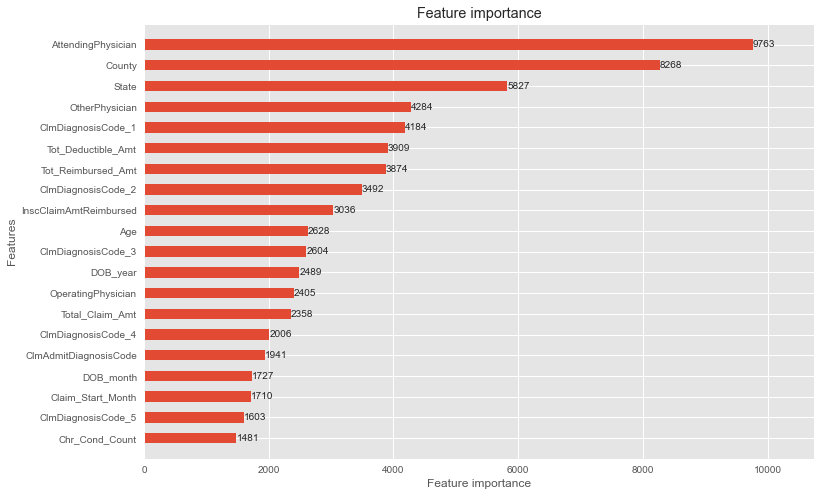

In [63]:
lgb.plot_importance(lgb_sm,height=.5,figsize=(12,8))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1728x1008 with 0 Axes>

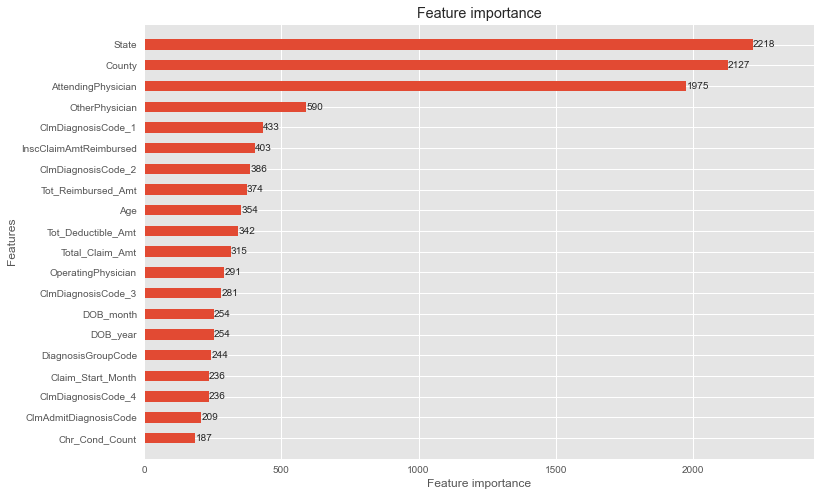

In [61]:
lgb.plot_importance(lgb_bsm,height=.5,figsize=(12,8))

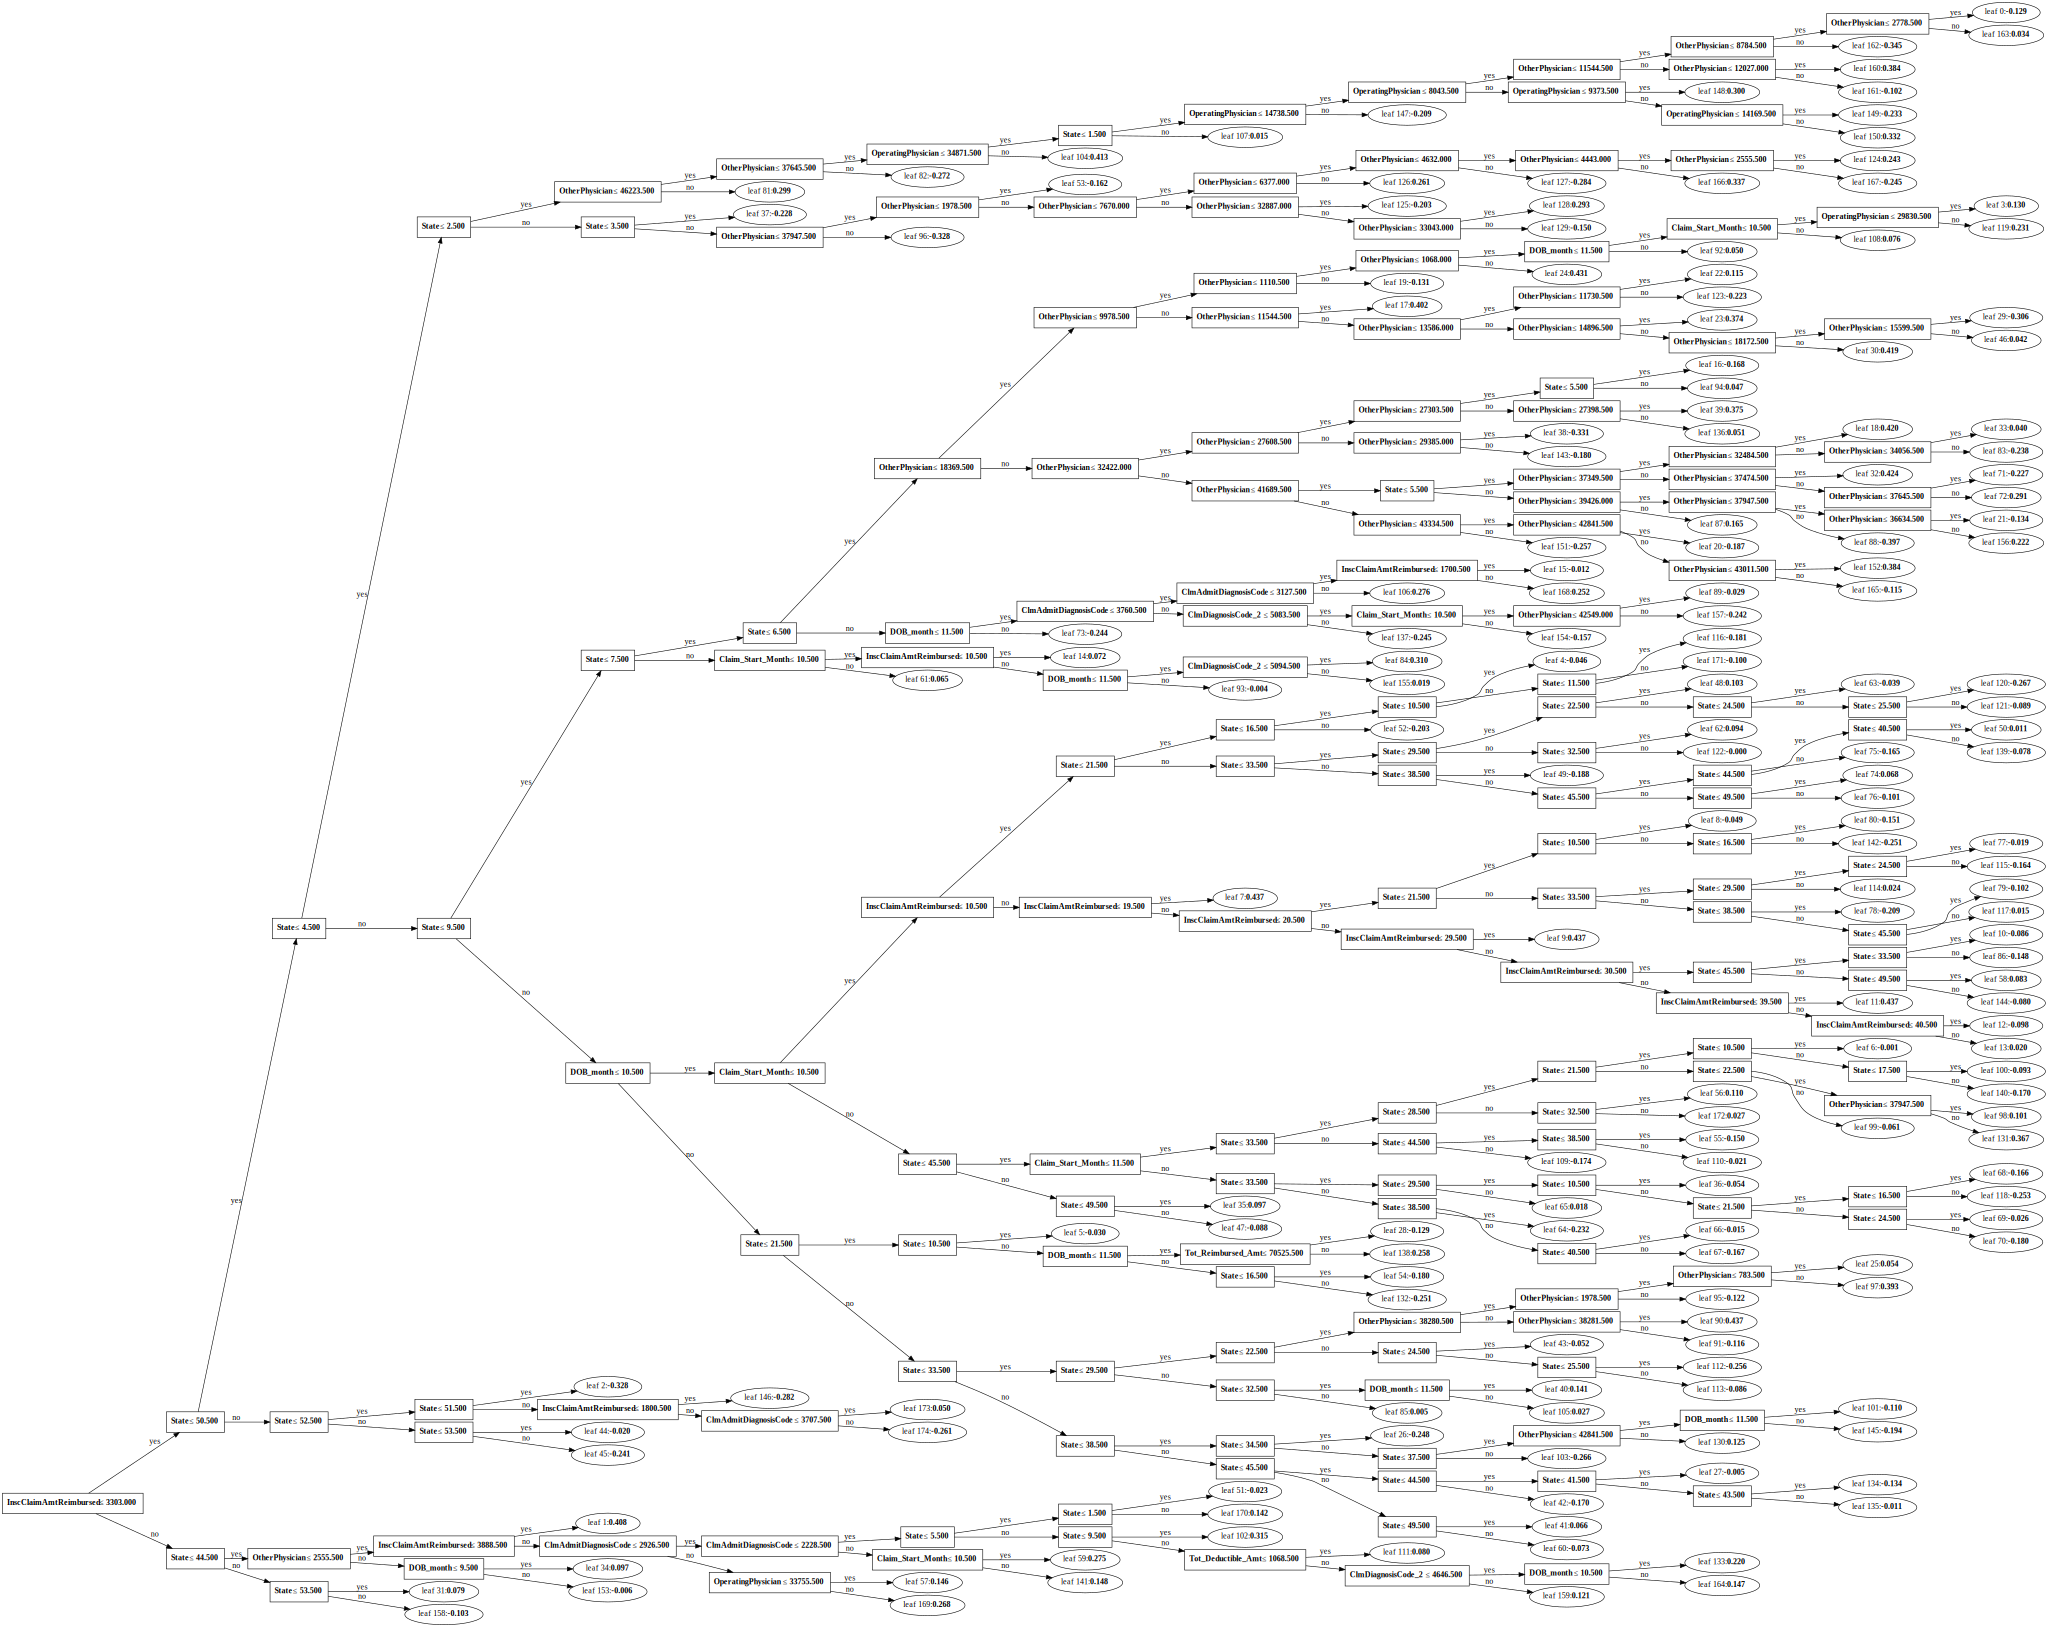

In [50]:
lgb.create_tree_digraph(lgb_sm)

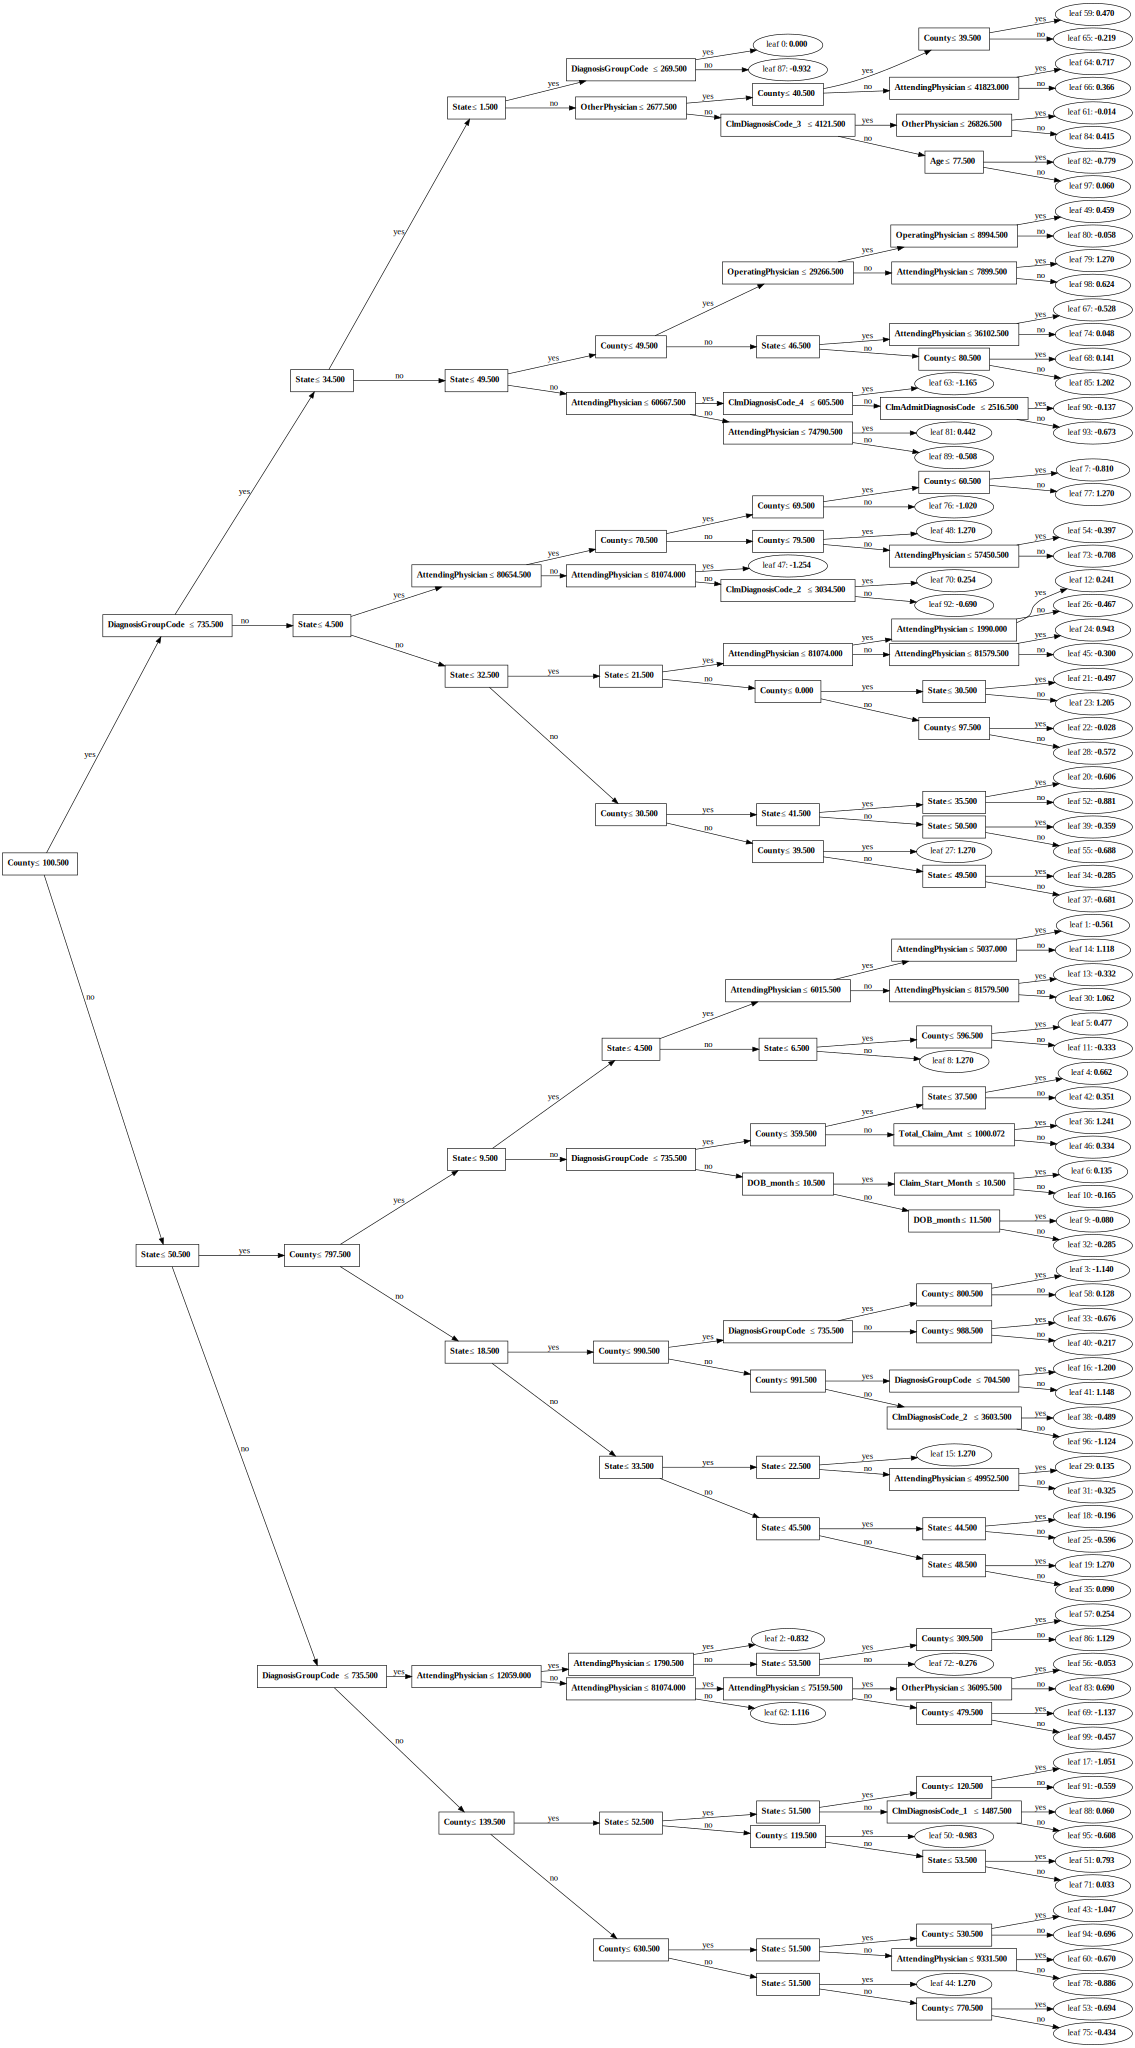

In [51]:
lgb.create_tree_digraph(lgb_bsm)

<AxesSubplot:title={'center':'Split value histogram for feature with name County'}, xlabel='Feature split value', ylabel='Count'>

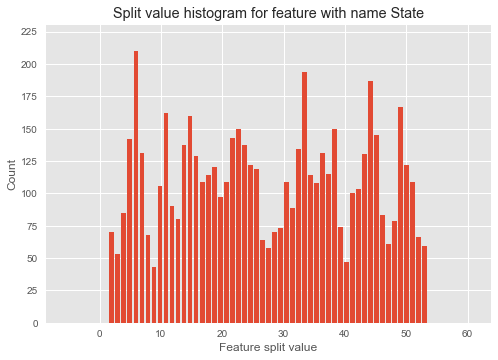

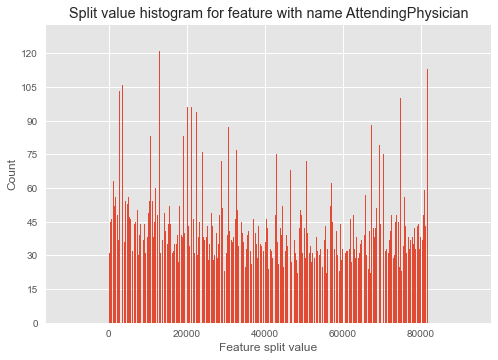

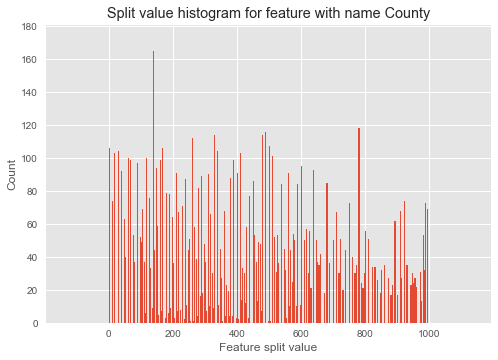

In [54]:
lgb.plot_split_value_histogram(lgb_sm, 'State')
lgb.plot_split_value_histogram(lgb_sm, 'AttendingPhysician')
lgb.plot_split_value_histogram(lgb_sm, 'County')

<AxesSubplot:title={'center':'Split value histogram for feature with name County'}, xlabel='Feature split value', ylabel='Count'>

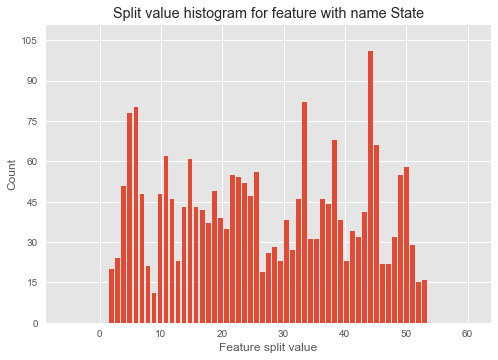

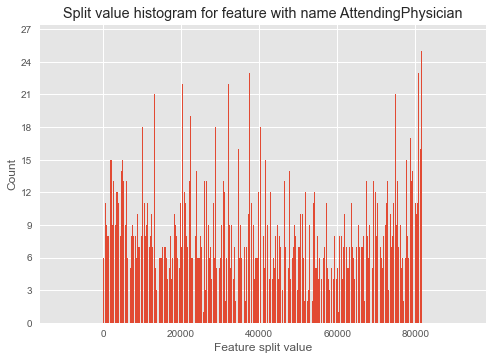

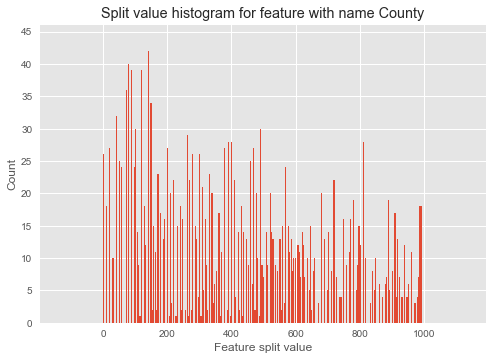

In [55]:
lgb.plot_split_value_histogram(lgb_bsm, 'State')
lgb.plot_split_value_histogram(lgb_bsm, 'AttendingPhysician')
lgb.plot_split_value_histogram(lgb_bsm, 'County')

### # Full set of evaluation metrics for both models:

- Confusion matrix:

In [ ]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    lgb_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

In [ ]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    lgb_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

- AUC/ROC curve

In [ ]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(lgb_sm, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_SM[selected_feat1], trainY_SM)        # Fit the training data to the visualizer
visualizer.score(testX_SM[selected_feat1], testY_SM)        # Evaluate the model on the test data

visualizer.show()

In [ ]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(lgb_bsm, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_BSM[selected_feat2], trainY_BSM)        # Fit the training data to the visualizer
visualizer.score(testX_BSM[selected_feat2], testY_BSM)        # Evaluate the model on the test data

visualizer.show()

- Classification report

In [ ]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    lgb_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

In [ ]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    lgb_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

- Precision-recall curve

In [ ]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(lgb_sm, trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM)
viz.show()

In [ ]:
# Visualizing precision-recall curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(lgb_bsm, trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM)
viz.show()

- Prediction error

In [ ]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    lgb_sm,
    trainX_SM[selected_feat1], trainY_SM.values.ravel(),
    testX_SM[selected_feat1], testY_SM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

In [ ]:
# Visualizing prediction error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    lgb_bsm,
    trainX_BSM[selected_feat2], trainY_BSM.values.ravel(),
    testX_BSM[selected_feat2], testY_BSM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

### # Threshold selection for both:

In [ ]:
# Visualizing the threshold

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
fpr1, tpr1, thresholds1 = roc_curve(trainY_SM,xg_sm.predict_proba(trainX_SM[selected_feat1])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds1,np.abs(fpr1+tpr1-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [ ]:
thresholds1[np.argmin(np.abs(fpr1+tpr1-1))]

In [ ]:
# Visualizing the threshold

sns.set_style("whitegrid")
fpr2, tpr2, thresholds2 = roc_curve(trainY_BSM,xg_bsm.predict_proba(trainX_BSM[selected_feat2])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds2,np.abs(fpr2+tpr2-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [ ]:
thresholds2[np.argmin(np.abs(fpr2+tpr2-1))]